# Import necessary libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
from nltk.sentiment import vader
import nltk
# nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
reviews = pd.read_csv('data/british_airways.csv')

In [3]:
reviews.head()

,Unnamed: 0,review_rating,review_title,username_loc_date,verified,review_text,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,wifi,value_for_money,recommended
0,0,2/10,"""It was a nightmare""",Guadalupe Carlos-Alarcon (United States) 18th ...,Not Verified,Not Verified | They changed our Flights from ...,NaN,Couple Leisure,Economy Class,Brussels to Los Angeles via London Heathrow,April 2023,1.0,4.0,1.0,3.0,1.0,1.0,1,no
1,1,5/10,"""Abysmal service""",Patrick Sparks (United States) 18th April 2023,Not Verified,Not Verified | At Copenhagen the most chaotic...,NaN,Couple Leisure,Economy Class,Copenhagen to London,April 2023,1.0,4.0,2.0,NaN,2.0,NaN,2,no
2,2,1/10,"""trained to give you the runaround""",T Cayle (United States) 17th April 2023,Trip Verified,✅ Trip Verified | Worst experience of my life...,NaN,Family Leisure,Economy Class,London to Denver,March 2023,2.0,5.0,2.0,3.0,4.0,1.0,1,no
3,3,3/10,"""they only had one choice of meal""",1 reviews\n\n\n\nAndrew Pybus (Hong Kong) 17th...,Trip Verified,✅ Trip Verified | Due to code sharing with Ca...,NaN,Solo Leisure,Economy Class,Hong Kong to London,April 2023,2.0,1.0,1.0,1.0,2.0,1.0,2,no
4,4,4/10,"""relentless BA cost cutting""",M Edwards (United Kingdom) 16th April 2023,Trip Verified,✅ Trip Verified | LHR check in was quick at t...,A320,Business,Business Class,Heathrow to Malaga,April 2023,3.0,3.0,4.0,NaN,3.0,1.0,2,no


# Data Wrangling

In [4]:
reviews.drop(columns=['Unnamed: 0'], inplace=True)
reviews["review_text"] = reviews["review_text"].str.replace('✅ Trip Verified', '')
reviews["review_text"] = reviews["review_text"].str.replace('|', '')
reviews["review_text"] = reviews["review_text"].str.replace('Not Verified', '')
reviews["review_text"] = reviews["review_text"].str.replace('✅ Verified Review', '')
reviews["review_text"] = reviews["review_text"].str.replace('❎ Unverified', '')
reviews["review_text"] = reviews["review_text"].str.strip()
reviews.head()

,review_rating,review_title,username_loc_date,verified,review_text,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,wifi,value_for_money,recommended
0,2/10,"""It was a nightmare""",Guadalupe Carlos-Alarcon (United States) 18th ...,Not Verified,They changed our Flights from Brussels to Lond...,NaN,Couple Leisure,Economy Class,Brussels to Los Angeles via London Heathrow,April 2023,1.0,4.0,1.0,3.0,1.0,1.0,1,no
1,5/10,"""Abysmal service""",Patrick Sparks (United States) 18th April 2023,Not Verified,At Copenhagen the most chaotic ticket counter ...,NaN,Couple Leisure,Economy Class,Copenhagen to London,April 2023,1.0,4.0,2.0,NaN,2.0,NaN,2,no
2,1/10,"""trained to give you the runaround""",T Cayle (United States) 17th April 2023,Trip Verified,Worst experience of my life trying to deal wit...,NaN,Family Leisure,Economy Class,London to Denver,March 2023,2.0,5.0,2.0,3.0,4.0,1.0,1,no
3,3/10,"""they only had one choice of meal""",1 reviews\n\n\n\nAndrew Pybus (Hong Kong) 17th...,Trip Verified,Due to code sharing with Cathay Pacific I was ...,NaN,Solo Leisure,Economy Class,Hong Kong to London,April 2023,2.0,1.0,1.0,1.0,2.0,1.0,2,no
4,4/10,"""relentless BA cost cutting""",M Edwards (United Kingdom) 16th April 2023,Trip Verified,LHR check in was quick at the First Wing and q...,A320,Business,Business Class,Heathrow to Malaga,April 2023,3.0,3.0,4.0,NaN,3.0,1.0,2,no


In [5]:
reviews.to_csv('data/British_Airways_semi_cleaned_data.csv')

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3520 entries, 0 to 3519
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_rating           3520 non-null   object 
 1   review_title            3520 non-null   object 
 2   username_loc_date       3520 non-null   object 
 3   verified                2012 non-null   object 
 4   review_text             3520 non-null   object 
 5   aircraft                1840 non-null   object 
 6   traveller_type          2761 non-null   object 
 7   seat_type               3517 non-null   object 
 8   route                   2757 non-null   object 
 9   date_flown              2753 non-null   object 
 10  seat_comfort            3419 non-null   float64
 11  cabin_staff_service     3409 non-null   float64
 12  food_beverages          3175 non-null   float64
 13  inflight_entertainment  2461 non-null   float64
 14  ground_service          2692 non-null   

In [7]:
reviews.dtypes

review_rating              object
review_title               object
username_loc_date          object
verified                   object
review_text                object
aircraft                   object
traveller_type             object
seat_type                  object
route                      object
date_flown                 object
seat_comfort              float64
cabin_staff_service       float64
food_beverages            float64
inflight_entertainment    float64
ground_service            float64
wifi                      float64
value_for_money             int64
recommended                object
dtype: object

In [8]:
reviews['review_rating'].head()

0    2/10
1    5/10
2    1/10
3    3/10
4    4/10
Name: review_rating, dtype: object

In [9]:
reviews['review_rating'].value_counts(dropna=False)

1/10     774
2/10     402
3/10     394
8/10     364
10/10    312
9/10     309
7/10     305
4/10     237
5/10     228
6/10     190
na         5
Name: review_rating, dtype: int64

In [10]:
reviews[reviews['review_rating'].str.contains('na')]

,review_rating,review_title,username_loc_date,verified,review_text,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,wifi,value_for_money,recommended
2951,na,British Airways customer review,Ray Desjardins (United Kingdom) 18th February ...,NaN,Cabin crew polite unfortunately BA ran out of ...,NaN,NaN,Economy Class,NaN,NaN,3.0,5.0,1.0,1.0,NaN,NaN,2,no
3085,na,British Airways customer review,Neil Balter (United States) 10th December 2014,NaN,Phoenix to London - outbound a wonderful and e...,NaN,NaN,First Class,NaN,NaN,1.0,5.0,4.0,2.0,NaN,NaN,2,no
3105,na,British Airways customer review,D Thomas (United Kingdom) 25th November 2014,NaN,On past experience I chose BA for our long hau...,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,2.0,1.0,NaN,NaN,3,no
3338,na,British Airways customer review,J Whittle (United Kingdom) 31st July 2014,NaN,LHR-CPH-LHR Business Class. This is a joke. Sc...,NaN,NaN,Business Class,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1,no
3372,na,British Airways customer review,Jackie Craig (Italy) 15th July 2014,NaN,I flew with British Airways with my mother fro...,NaN,NaN,Economy Class,NaN,NaN,1.0,3.0,1.0,1.0,NaN,NaN,1,no


In [11]:
reviews['review_rating'] = reviews['review_rating'].str.replace('/10', '')
reviews['review_rating'].replace('na', pd.NA, inplace=True)
reviews['review_rating'].value_counts(dropna=False)

1       774
2       402
3       394
8       364
10      312
9       309
7       305
4       237
5       228
6       190
<NA>      5
Name: review_rating, dtype: int64

In [12]:
reviews.isna().sum()

review_rating                5
review_title                 0
username_loc_date            0
verified                  1508
review_text                  0
aircraft                  1680
traveller_type             759
seat_type                    3
route                      763
date_flown                 767
seat_comfort               101
cabin_staff_service        111
food_beverages             345
inflight_entertainment    1059
ground_service             828
wifi                      2978
value_for_money              0
recommended                  0
dtype: int64

In [13]:
reviews.shape

(3520, 18)

### Handling Missing Values

In [14]:
mycolors = ["limegreen", "hotpink", "blue"]

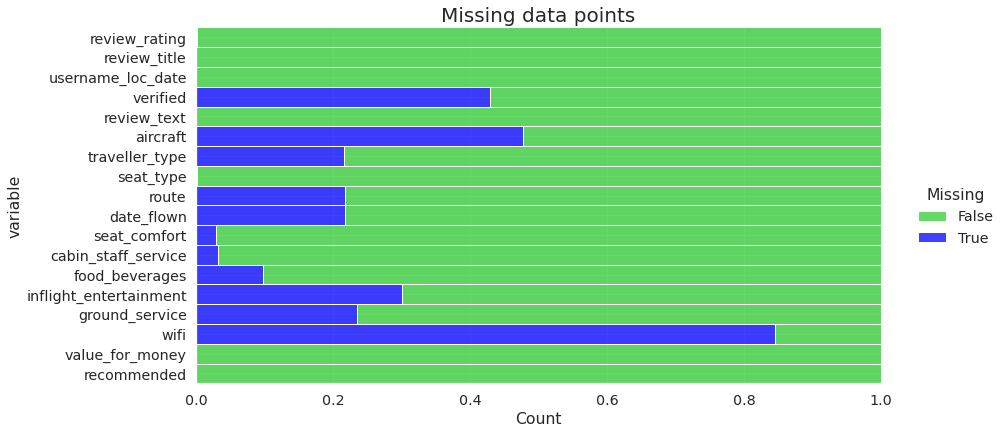

In [15]:
sns.set(font_scale=1.3)
sns.displot(
    data=reviews.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    height=6,
    aspect=2.15,
    palette=mycolors[::2]
)

plt.title('Missing data points', fontdict={'size':20})

plt.show()

In [16]:
reviews.head()

,review_rating,review_title,username_loc_date,verified,review_text,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,wifi,value_for_money,recommended
0,2,"""It was a nightmare""",Guadalupe Carlos-Alarcon (United States) 18th ...,Not Verified,They changed our Flights from Brussels to Lond...,NaN,Couple Leisure,Economy Class,Brussels to Los Angeles via London Heathrow,April 2023,1.0,4.0,1.0,3.0,1.0,1.0,1,no
1,5,"""Abysmal service""",Patrick Sparks (United States) 18th April 2023,Not Verified,At Copenhagen the most chaotic ticket counter ...,NaN,Couple Leisure,Economy Class,Copenhagen to London,April 2023,1.0,4.0,2.0,NaN,2.0,NaN,2,no
2,1,"""trained to give you the runaround""",T Cayle (United States) 17th April 2023,Trip Verified,Worst experience of my life trying to deal wit...,NaN,Family Leisure,Economy Class,London to Denver,March 2023,2.0,5.0,2.0,3.0,4.0,1.0,1,no
3,3,"""they only had one choice of meal""",1 reviews\n\n\n\nAndrew Pybus (Hong Kong) 17th...,Trip Verified,Due to code sharing with Cathay Pacific I was ...,NaN,Solo Leisure,Economy Class,Hong Kong to London,April 2023,2.0,1.0,1.0,1.0,2.0,1.0,2,no
4,4,"""relentless BA cost cutting""",M Edwards (United Kingdom) 16th April 2023,Trip Verified,LHR check in was quick at the First Wing and q...,A320,Business,Business Class,Heathrow to Malaga,April 2023,3.0,3.0,4.0,NaN,3.0,1.0,2,no


In [17]:
reviews.tail(10)

,review_rating,review_title,username_loc_date,verified,review_text,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,wifi,value_for_money,recommended
3510,7,British Airways customer review,Berry Nick (United Kingdom) 6th May 2014,NaN,JFK to LHR. Empty check in and priority securi...,NaN,NaN,Business Class,NaN,NaN,4.0,4.0,4.0,4.0,NaN,NaN,4,yes
3511,10,British Airways customer review,C Denson (United Kingdom) 5th May 2014,NaN,Chicago O'Hare to London Heathrow on 2 May. ch...,NaN,NaN,Economy Class,NaN,NaN,4.0,5.0,5.0,4.0,NaN,NaN,5,yes
3512,10,British Airways customer review,A Hickling (United Kingdom) 4th May 2014,NaN,Travelled to HKG on board the new A380. Boardi...,NaN,NaN,First Class,NaN,NaN,5.0,5.0,5.0,5.0,NaN,NaN,5,yes
3513,1,British Airways customer review,Iain Henderson (United Kingdom) 3rd May 2014,NaN,BA 059 London to Cape Town April 29 2014 econo...,NaN,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1,no
3514,2,British Airways customer review,G Pardoe (United Kingdom) 3rd May 2014,NaN,Las Vegas-LGW 777 3 class. Business. The uniqu...,NaN,NaN,Business Class,NaN,NaN,3.0,1.0,1.0,4.0,NaN,NaN,3,no
3515,8,British Airways customer review,Guy Senior (United Kingdom) 30th April 2014,NaN,An interesting contrast on recent Gatwick to T...,NaN,NaN,Business Class,NaN,NaN,4.0,5.0,5.0,3.0,NaN,NaN,4,yes
3516,8,British Airways customer review,Jack Hughes (United Kingdom) 30th August 2012,NaN,Heathrow Marrakech. Had previously travelled o...,NaN,NaN,Economy Class,NaN,NaN,4.0,5.0,4.0,0.0,NaN,NaN,3,yes
3517,6,British Airways customer review,W Benson (United Kingdom) 29th August 2012,NaN,HKG-LHR in New Club World on Boeing 777-300 - ...,NaN,NaN,Business Class,NaN,NaN,4.0,3.0,3.0,4.0,NaN,NaN,0,yes
3518,8,British Airways customer review,Michael Dielissen (Canada) 29th August 2012,NaN,YYZ to LHR - July 2012 - I flew overnight in p...,NaN,NaN,Premium Economy,NaN,NaN,4.0,3.0,3.0,4.0,NaN,NaN,4,yes
3519,5,British Airways customer review,D Nolan (Ireland) 29th August 2012,NaN,Flew return in CW from LHR to BKK in August 20...,NaN,NaN,Business Class,NaN,NaN,4.0,3.0,2.0,4.0,NaN,NaN,3,yes


##### Extract Country Location

In [18]:
reviews['username_loc_date'][0]

'Guadalupe Carlos-Alarcon (United States) 18th April 2023'

In [19]:
reviews['username_loc_date'].str.extract("(\(.*?\))", expand=True)

,0
0,(United States)
1,(United States)
2,(United States)
3,(Hong Kong)
4,(United Kingdom)
...,...
3515,(United Kingdom)
3516,(United Kingdom)
3517,(United Kingdom)
3518,(Canada)


In [20]:
reviews['username_loc_date'].str.extract("(\(.*?\))", expand=True) \
                    .iloc[:,0].str.replace('(', '').str.replace(')', '')

0        United States
1        United States
2        United States
3            Hong Kong
4       United Kingdom
             ...      
3515    United Kingdom
3516    United Kingdom
3517    United Kingdom
3518            Canada
3519           Ireland
Name: 0, Length: 3520, dtype: object

In [21]:
reviews['location'] = reviews['username_loc_date'].str.extract("(\(.*?\))", expand=True) \
                                    .iloc[:,0].str.replace('(', '').str.replace(')', '')

reviews.head()

,review_rating,review_title,username_loc_date,verified,review_text,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,wifi,value_for_money,recommended,location
0,2,"""It was a nightmare""",Guadalupe Carlos-Alarcon (United States) 18th ...,Not Verified,They changed our Flights from Brussels to Lond...,NaN,Couple Leisure,Economy Class,Brussels to Los Angeles via London Heathrow,April 2023,1.0,4.0,1.0,3.0,1.0,1.0,1,no,United States
1,5,"""Abysmal service""",Patrick Sparks (United States) 18th April 2023,Not Verified,At Copenhagen the most chaotic ticket counter ...,NaN,Couple Leisure,Economy Class,Copenhagen to London,April 2023,1.0,4.0,2.0,NaN,2.0,NaN,2,no,United States
2,1,"""trained to give you the runaround""",T Cayle (United States) 17th April 2023,Trip Verified,Worst experience of my life trying to deal wit...,NaN,Family Leisure,Economy Class,London to Denver,March 2023,2.0,5.0,2.0,3.0,4.0,1.0,1,no,United States
3,3,"""they only had one choice of meal""",1 reviews\n\n\n\nAndrew Pybus (Hong Kong) 17th...,Trip Verified,Due to code sharing with Cathay Pacific I was ...,NaN,Solo Leisure,Economy Class,Hong Kong to London,April 2023,2.0,1.0,1.0,1.0,2.0,1.0,2,no,Hong Kong
4,4,"""relentless BA cost cutting""",M Edwards (United Kingdom) 16th April 2023,Trip Verified,LHR check in was quick at the First Wing and q...,A320,Business,Business Class,Heathrow to Malaga,April 2023,3.0,3.0,4.0,NaN,3.0,1.0,2,no,United Kingdom


In [22]:
reviews['location'].unique()

array(['United States', 'Hong Kong', 'United Kingdom', 'Netherlands',
       'Austria', 'France', 'India', 'Ireland', 'Australia', 'Canada',
       'Belgium', 'United Arab Emirates', 'Spain', 'New Zealand',
       'Czech Republic', 'Italy', 'Malaysia', 'Singapore', 'South Africa',
       'Ghana', 'Germany', 'Switzerland', 'Bermuda', 'Botswana', 'Brazil',
       'Panama', 'Sweden', 'Greece', 'Nigeria', 'Russian Federation',
       'Philippines', 'Bulgaria', 'Poland', 'Thailand', 'Argentina',
       'Mexico', 'Denmark', 'Saint Kitts and Nevis', 'Vietnam', 'Norway',
       'Jordan', 'Japan', 'Taiwan', 'China', 'Slovakia', 'Kuwait',
       'Israel', 'Qatar', 'Romania', 'South Korea', 'Saudi Arabia',
       'Hungary', 'Portugal', 'Cayman Islands', 'Costa Rica', 'Egypt',
       'Iceland', 'Laos', 'Turkey', 'Indonesia', 'Bahrain',
       'Dominican Republic', 'Cyprus', 'Luxembourg', 'Finland', 'Ukraine',
       nan, 'Trinidad & Tobago', 'Barbados', 'Oman'], dtype=object)

In [23]:
reviews[reviews['location'].isna()]

,review_rating,review_title,username_loc_date,verified,review_text,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,wifi,value_for_money,recommended,location
2887,2,British Airways customer review,S Stevenson 8th April 2015,NaN,I travelled from London to Jo'burg and back on...,NaN,NaN,Business Class,NaN,NaN,1.0,5.0,3.0,4.0,NaN,NaN,1,no,NaN
3187,6,British Airways customer review,Guillaume Christian 20th October 2014,NaN,St Lucia to London round trip. Full flight bot...,NaN,NaN,Economy Class,NaN,NaN,4.0,3.0,4.0,2.0,NaN,NaN,3,yes,NaN
3193,6,British Airways customer review,Guillaume Christian 20th October 2014,NaN,St Lucia to London round trip. Full flight bot...,NaN,NaN,Economy Class,NaN,NaN,4.0,3.0,4.0,2.0,NaN,NaN,3,yes,NaN


In [24]:
reviews.dropna(subset=['location'], inplace=True)
reviews[reviews['location'].isna()]

,review_rating,review_title,username_loc_date,verified,review_text,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,wifi,value_for_money,recommended,location


In [25]:
reviews.reset_index(inplace=True)
reviews.head()

,index,review_rating,review_title,username_loc_date,verified,review_text,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,wifi,value_for_money,recommended,location
0,0,2,"""It was a nightmare""",Guadalupe Carlos-Alarcon (United States) 18th ...,Not Verified,They changed our Flights from Brussels to Lond...,NaN,Couple Leisure,Economy Class,Brussels to Los Angeles via London Heathrow,April 2023,1.0,4.0,1.0,3.0,1.0,1.0,1,no,United States
1,1,5,"""Abysmal service""",Patrick Sparks (United States) 18th April 2023,Not Verified,At Copenhagen the most chaotic ticket counter ...,NaN,Couple Leisure,Economy Class,Copenhagen to London,April 2023,1.0,4.0,2.0,NaN,2.0,NaN,2,no,United States
2,2,1,"""trained to give you the runaround""",T Cayle (United States) 17th April 2023,Trip Verified,Worst experience of my life trying to deal wit...,NaN,Family Leisure,Economy Class,London to Denver,March 2023,2.0,5.0,2.0,3.0,4.0,1.0,1,no,United States
3,3,3,"""they only had one choice of meal""",1 reviews\n\n\n\nAndrew Pybus (Hong Kong) 17th...,Trip Verified,Due to code sharing with Cathay Pacific I was ...,NaN,Solo Leisure,Economy Class,Hong Kong to London,April 2023,2.0,1.0,1.0,1.0,2.0,1.0,2,no,Hong Kong
4,4,4,"""relentless BA cost cutting""",M Edwards (United Kingdom) 16th April 2023,Trip Verified,LHR check in was quick at the First Wing and q...,A320,Business,Business Class,Heathrow to Malaga,April 2023,3.0,3.0,4.0,NaN,3.0,1.0,2,no,United Kingdom


In [26]:
reviews.drop(columns=['index'], inplace=True)
reviews.head()

,review_rating,review_title,username_loc_date,verified,review_text,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,wifi,value_for_money,recommended,location
0,2,"""It was a nightmare""",Guadalupe Carlos-Alarcon (United States) 18th ...,Not Verified,They changed our Flights from Brussels to Lond...,NaN,Couple Leisure,Economy Class,Brussels to Los Angeles via London Heathrow,April 2023,1.0,4.0,1.0,3.0,1.0,1.0,1,no,United States
1,5,"""Abysmal service""",Patrick Sparks (United States) 18th April 2023,Not Verified,At Copenhagen the most chaotic ticket counter ...,NaN,Couple Leisure,Economy Class,Copenhagen to London,April 2023,1.0,4.0,2.0,NaN,2.0,NaN,2,no,United States
2,1,"""trained to give you the runaround""",T Cayle (United States) 17th April 2023,Trip Verified,Worst experience of my life trying to deal wit...,NaN,Family Leisure,Economy Class,London to Denver,March 2023,2.0,5.0,2.0,3.0,4.0,1.0,1,no,United States
3,3,"""they only had one choice of meal""",1 reviews\n\n\n\nAndrew Pybus (Hong Kong) 17th...,Trip Verified,Due to code sharing with Cathay Pacific I was ...,NaN,Solo Leisure,Economy Class,Hong Kong to London,April 2023,2.0,1.0,1.0,1.0,2.0,1.0,2,no,Hong Kong
4,4,"""relentless BA cost cutting""",M Edwards (United Kingdom) 16th April 2023,Trip Verified,LHR check in was quick at the First Wing and q...,A320,Business,Business Class,Heathrow to Malaga,April 2023,3.0,3.0,4.0,NaN,3.0,1.0,2,no,United Kingdom


##### Extraxt Date

In [27]:
reviews['username_loc_date'].str.split(')').apply(lambda x: x[1].strip())

0        18th April 2023
1        18th April 2023
2        17th April 2023
3        17th April 2023
4        16th April 2023
              ...       
3512     30th April 2014
3513    30th August 2012
3514    29th August 2012
3515    29th August 2012
3516    29th August 2012
Name: username_loc_date, Length: 3517, dtype: object

In [28]:
reviews['date'] = reviews['username_loc_date'].str.split(')').apply(lambda x: x[1].strip())
reviews['date']

0        18th April 2023
1        18th April 2023
2        17th April 2023
3        17th April 2023
4        16th April 2023
              ...       
3512     30th April 2014
3513    30th August 2012
3514    29th August 2012
3515    29th August 2012
3516    29th August 2012
Name: date, Length: 3517, dtype: object

In [29]:
reviews['date_converted'] = reviews['date'].apply(parse)
reviews['date_converted']

0      2023-04-18
1      2023-04-18
2      2023-04-17
3      2023-04-17
4      2023-04-16
          ...    
3512   2014-04-30
3513   2012-08-30
3514   2012-08-29
3515   2012-08-29
3516   2012-08-29
Name: date_converted, Length: 3517, dtype: datetime64[ns]

In [30]:
reviews.head()

,review_rating,review_title,username_loc_date,verified,review_text,aircraft,traveller_type,seat_type,route,date_flown,...,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,wifi,value_for_money,recommended,location,date,date_converted
0,2,"""It was a nightmare""",Guadalupe Carlos-Alarcon (United States) 18th ...,Not Verified,They changed our Flights from Brussels to Lond...,NaN,Couple Leisure,Economy Class,Brussels to Los Angeles via London Heathrow,April 2023,...,4.0,1.0,3.0,1.0,1.0,1,no,United States,18th April 2023,2023-04-18
1,5,"""Abysmal service""",Patrick Sparks (United States) 18th April 2023,Not Verified,At Copenhagen the most chaotic ticket counter ...,NaN,Couple Leisure,Economy Class,Copenhagen to London,April 2023,...,4.0,2.0,NaN,2.0,NaN,2,no,United States,18th April 2023,2023-04-18
2,1,"""trained to give you the runaround""",T Cayle (United States) 17th April 2023,Trip Verified,Worst experience of my life trying to deal wit...,NaN,Family Leisure,Economy Class,London to Denver,March 2023,...,5.0,2.0,3.0,4.0,1.0,1,no,United States,17th April 2023,2023-04-17
3,3,"""they only had one choice of meal""",1 reviews\n\n\n\nAndrew Pybus (Hong Kong) 17th...,Trip Verified,Due to code sharing with Cathay Pacific I was ...,NaN,Solo Leisure,Economy Class,Hong Kong to London,April 2023,...,1.0,1.0,1.0,2.0,1.0,2,no,Hong Kong,17th April 2023,2023-04-17
4,4,"""relentless BA cost cutting""",M Edwards (United Kingdom) 16th April 2023,Trip Verified,LHR check in was quick at the First Wing and q...,A320,Business,Business Class,Heathrow to Malaga,April 2023,...,3.0,4.0,NaN,3.0,1.0,2,no,United Kingdom,16th April 2023,2023-04-16


In [31]:
reviews.verified.value_counts()

Trip Verified              1027
Verified Review             770
Not Verified                190
Unverified                   20
British Airways Ranking       4
Ryanair                       1
Name: verified, dtype: int64

In [32]:
replace_map = {'Trip Verified':'Verified',
               'Verified Review':'Verified',
               'Not Verified':'Unverified',
               'British Airways Ranking':'Unverified',
               'Ryanair':'Unverified'}

reviews.verified.replace(replace_map, inplace=True)
reviews.verified.value_counts()

Verified      1797
Unverified     215
Name: verified, dtype: int64

In [33]:
reviews.verified.value_counts(dropna=False)

Verified      1797
NaN           1505
Unverified     215
Name: verified, dtype: int64

In [34]:
reviews.verified.fillna('Unverified', inplace=True)
reviews.verified.value_counts()

Verified      1797
Unverified    1720
Name: verified, dtype: int64

##### 5% rule

In [35]:
threshold = len(reviews) * 0.05
threshold

175.85000000000002

In [36]:
reviews.columns[(reviews.isna().sum() > 0) & (reviews.isna().sum() <= threshold)]

Index(['review_rating', 'seat_type', 'seat_comfort', 'cabin_staff_service'], dtype='object')

In [37]:
cols_to_drop = reviews.columns[(reviews.isna().sum() > 0) \
                               & (reviews.isna().sum() <= threshold)]

In [38]:
reviews.dropna(subset=cols_to_drop, inplace=True)
reviews.shape

(3398, 21)

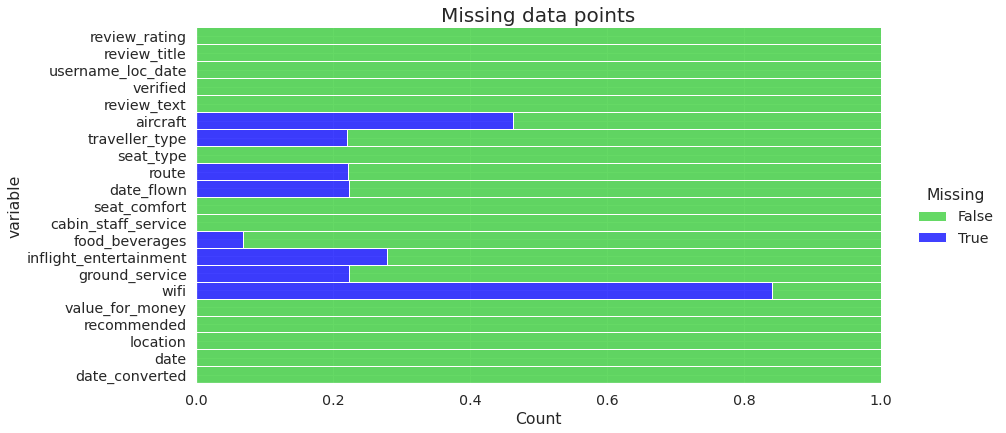

In [39]:
sns.set(font_scale=1.3)
sns.displot(
    data=reviews.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    height=6,
    aspect=2.15,
    palette=mycolors[::2]
)

plt.title('Missing data points', fontdict={'size':20})

plt.show()

In [40]:
reviews.isna().sum()

review_rating                0
review_title                 0
username_loc_date            0
verified                     0
review_text                  0
aircraft                  1570
traveller_type             748
seat_type                    0
route                      752
date_flown                 757
seat_comfort                 0
cabin_staff_service          0
food_beverages             234
inflight_entertainment     948
ground_service             760
wifi                      2857
value_for_money              0
recommended                  0
location                     0
date                         0
date_converted               0
dtype: int64

In [41]:
reviews.shape[0]

3398

In [42]:
num_rows = reviews.shape[0]

In [43]:
round(reviews.isna().sum() * (100/num_rows), 2)

review_rating              0.00
review_title               0.00
username_loc_date          0.00
verified                   0.00
review_text                0.00
aircraft                  46.20
traveller_type            22.01
seat_type                  0.00
route                     22.13
date_flown                22.28
seat_comfort               0.00
cabin_staff_service        0.00
food_beverages             6.89
inflight_entertainment    27.90
ground_service            22.37
wifi                      84.08
value_for_money            0.00
recommended                0.00
location                   0.00
date                       0.00
date_converted             0.00
dtype: float64

##### Drop `aircraft` and `wifi` columns cause they have large percentage of missing data

In [44]:
reviews.drop(columns=['aircraft', 'wifi'], inplace=True)

##### Drop `date_flown` as a new `date` column has been extracted

In [45]:
reviews.drop(columns=['date_flown'], inplace=True)

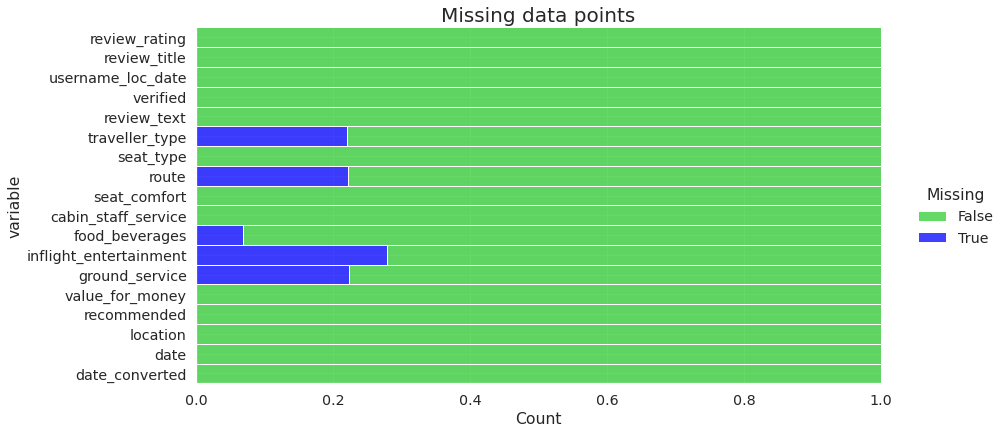

In [46]:
sns.set(font_scale=1.3)
sns.displot(
    data=reviews.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    height=6,
    aspect=2.15,
    palette=mycolors[::2]
)

plt.title('Missing data points', fontdict={'size':20})

plt.show()

In [47]:
round(reviews.isna().sum() * (100/num_rows), 2)

review_rating              0.00
review_title               0.00
username_loc_date          0.00
verified                   0.00
review_text                0.00
traveller_type            22.01
seat_type                  0.00
route                     22.13
seat_comfort               0.00
cabin_staff_service        0.00
food_beverages             6.89
inflight_entertainment    27.90
ground_service            22.37
value_for_money            0.00
recommended                0.00
location                   0.00
date                       0.00
date_converted             0.00
dtype: float64

In [48]:
reviews.columns[reviews.isna().sum() > 0]

Index(['traveller_type', 'route', 'food_beverages', 'inflight_entertainment',
       'ground_service'],
      dtype='object')

In [49]:
cols_to_fill = reviews.columns[reviews.isna().sum() > 0]
reviews[cols_to_fill]

,traveller_type,route,food_beverages,inflight_entertainment,ground_service
0,Couple Leisure,Brussels to Los Angeles via London Heathrow,1.0,3.0,1.0
1,Couple Leisure,Copenhagen to London,2.0,NaN,2.0
2,Family Leisure,London to Denver,2.0,3.0,4.0
3,Solo Leisure,Hong Kong to London,1.0,1.0,2.0
4,Business,Heathrow to Malaga,4.0,NaN,3.0
...,...,...,...,...,...
3512,NaN,NaN,5.0,3.0,NaN
3513,NaN,NaN,4.0,0.0,NaN
3514,NaN,NaN,3.0,4.0,NaN
3515,NaN,NaN,3.0,4.0,NaN


##### Imputation by sub-group

In [50]:
reviews.seat_type.value_counts()

Economy Class      1738
Business Class     1108
Premium Economy     345
First Class         207
Name: seat_type, dtype: int64

##### Impute mode of sub-groups for `traveller_type` and `route` columns

In [51]:
reviews.groupby('seat_type')['traveller_type'].agg(pd.Series.mode)

seat_type
Business Class     Couple Leisure
Economy Class        Solo Leisure
First Class        Couple Leisure
Premium Economy      Solo Leisure
Name: traveller_type, dtype: object

In [52]:
traveller_type_dict = reviews.groupby('seat_type')['traveller_type'] \
                                        .agg(pd.Series.mode).to_dict()

In [53]:
reviews.groupby('seat_type')['route'].agg(pd.Series.mode)

seat_type
Business Class     [Cape Town to London, London to Johannesburg]
Economy Class                                   London to Athens
First Class                                           LHR to SIN
Premium Economy                              Vancouver to London
Name: route, dtype: object

In [54]:
route_dict = reviews.groupby('seat_type')['route'] \
                                .agg(pd.Series.mode).to_dict()

route_dict['Business Class'] = 'London to Johannesburg'
route_dict

{'Business Class': 'London to Johannesburg',
 'Economy Class': 'London to Athens',
 'First Class': 'LHR to SIN',
 'Premium Economy': 'Vancouver to London'}

In [55]:
reviews['traveller_type'] = reviews['traveller_type'] \
                                .fillna(reviews['seat_type'].map(traveller_type_dict))

reviews['route'] = reviews['route'].fillna(reviews['seat_type'].map(route_dict))

In [56]:
reviews[['traveller_type', 'route']]

,traveller_type,route
0,Couple Leisure,Brussels to Los Angeles via London Heathrow
1,Couple Leisure,Copenhagen to London
2,Family Leisure,London to Denver
3,Solo Leisure,Hong Kong to London
4,Business,Heathrow to Malaga
...,...,...
3512,Couple Leisure,London to Johannesburg
3513,Solo Leisure,London to Athens
3514,Couple Leisure,London to Johannesburg
3515,Solo Leisure,Vancouver to London


In [57]:
reviews[cols_to_fill]

,traveller_type,route,food_beverages,inflight_entertainment,ground_service
0,Couple Leisure,Brussels to Los Angeles via London Heathrow,1.0,3.0,1.0
1,Couple Leisure,Copenhagen to London,2.0,NaN,2.0
2,Family Leisure,London to Denver,2.0,3.0,4.0
3,Solo Leisure,Hong Kong to London,1.0,1.0,2.0
4,Business,Heathrow to Malaga,4.0,NaN,3.0
...,...,...,...,...,...
3512,Couple Leisure,London to Johannesburg,5.0,3.0,NaN
3513,Solo Leisure,London to Athens,4.0,0.0,NaN
3514,Couple Leisure,London to Johannesburg,3.0,4.0,NaN
3515,Solo Leisure,Vancouver to London,3.0,4.0,NaN


##### Impute mode of sub-groups for `food_beverages` , `inflight_entertainment` and `ground_service`

In [58]:
reviews.groupby('seat_type')['food_beverages'].median()

seat_type
Business Class     3.0
Economy Class      2.0
First Class        4.0
Premium Economy    3.0
Name: food_beverages, dtype: float64

In [59]:
reviews.groupby('seat_type')['inflight_entertainment'].median()

seat_type
Business Class     3.0
Economy Class      2.0
First Class        3.0
Premium Economy    3.0
Name: inflight_entertainment, dtype: float64

In [60]:
reviews.groupby('seat_type')['ground_service'].median()

seat_type
Business Class     3.0
Economy Class      3.0
First Class        3.0
Premium Economy    3.0
Name: ground_service, dtype: float64

In [61]:
foods_dict = reviews.groupby('seat_type')['food_beverages'] \
                                        .median().to_dict()

entertain_dict = reviews.groupby('seat_type')['inflight_entertainment'] \
                                        .median().to_dict()

ground_service_dict = reviews.groupby('seat_type')['ground_service'] \
                                        .median().to_dict()

In [62]:
reviews['food_beverages'] = reviews['food_beverages'] \
                                .fillna(reviews['seat_type'].map(foods_dict))

reviews['inflight_entertainment'] = reviews['inflight_entertainment'] \
                                .fillna(reviews['seat_type'].map(entertain_dict))

reviews['ground_service'] = reviews['ground_service'] \
                                .fillna(reviews['seat_type'].map(ground_service_dict))

In [63]:
reviews[cols_to_fill]

,traveller_type,route,food_beverages,inflight_entertainment,ground_service
0,Couple Leisure,Brussels to Los Angeles via London Heathrow,1.0,3.0,1.0
1,Couple Leisure,Copenhagen to London,2.0,2.0,2.0
2,Family Leisure,London to Denver,2.0,3.0,4.0
3,Solo Leisure,Hong Kong to London,1.0,1.0,2.0
4,Business,Heathrow to Malaga,4.0,3.0,3.0
...,...,...,...,...,...
3512,Couple Leisure,London to Johannesburg,5.0,3.0,3.0
3513,Solo Leisure,London to Athens,4.0,0.0,3.0
3514,Couple Leisure,London to Johannesburg,3.0,4.0,3.0
3515,Solo Leisure,Vancouver to London,3.0,4.0,3.0


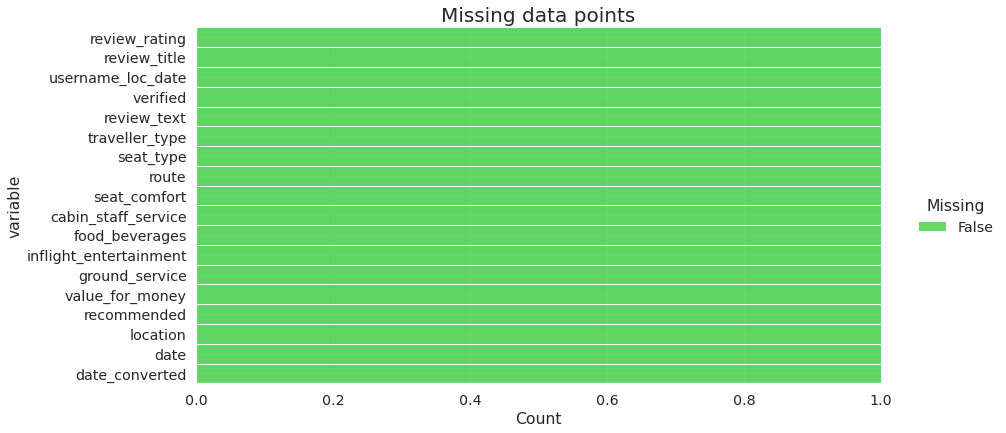

In [64]:
sns.set(font_scale=1.3)
sns.displot(
    data=reviews.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    height=6,
    aspect=2.15,
    palette=mycolors[:1]
)

plt.title('Missing data points', fontdict={'size':20})

plt.show()

In [65]:
reviews.isna().sum()

review_rating             0
review_title              0
username_loc_date         0
verified                  0
review_text               0
traveller_type            0
seat_type                 0
route                     0
seat_comfort              0
cabin_staff_service       0
food_beverages            0
inflight_entertainment    0
ground_service            0
value_for_money           0
recommended               0
location                  0
date                      0
date_converted            0
dtype: int64

In [66]:
reviews.shape

(3398, 18)

# Exploratory Data Analysis

In [67]:
reviews.dtypes

review_rating                     object
review_title                      object
username_loc_date                 object
verified                          object
review_text                       object
traveller_type                    object
seat_type                         object
route                             object
seat_comfort                     float64
cabin_staff_service              float64
food_beverages                   float64
inflight_entertainment           float64
ground_service                   float64
value_for_money                    int64
recommended                       object
location                          object
date                              object
date_converted            datetime64[ns]
dtype: object

In [68]:
reviews['review_rating'] = reviews['review_rating'].astype(int)

In [69]:
for col in reviews.select_dtypes('float').columns:
    reviews[col] = reviews[col].astype(int)

In [70]:
reviews.dtypes

review_rating                      int64
review_title                      object
username_loc_date                 object
verified                          object
review_text                       object
traveller_type                    object
seat_type                         object
route                             object
seat_comfort                       int64
cabin_staff_service                int64
food_beverages                     int64
inflight_entertainment             int64
ground_service                     int64
value_for_money                    int64
recommended                       object
location                          object
date                              object
date_converted            datetime64[ns]
dtype: object

In [71]:
reviews.describe()

,review_rating,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,value_for_money
count,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000
mean,4.930842,2.902001,3.273102,2.692466,2.570335,2.896410,2.779576
std,3.144482,1.359489,1.486527,1.399317,1.226329,1.270291,1.458069
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000
50%,5.000000,3.000000,3.500000,3.000000,2.000000,3.000000,3.000000
75%,8.000000,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [72]:
reviews.describe(include=['O'])

,review_title,username_loc_date,verified,review_text,traveller_type,seat_type,route,recommended,location,date
count,3398,3398,3398,3398,3398,3398,3398,3398,3398,3398
unique,2411,3219,2,3319,4,4,1467,2,68,1641
top,British Airways customer review,James Williamson (United Kingdom) 12th June 2015,Verified,My wife and I travelled from Manchester to Las...,Couple Leisure,Economy Class,London to Athens,no,United Kingdom,19th January 2015
freq,932,4,1718,2,1242,1738,339,1936,2178,26


In [73]:
reviews.value_counts('review_rating')

review_rating
1     685
3     390
2     386
8     364
10    310
9     309
7     305
4     233
5     228
6     188
dtype: int64

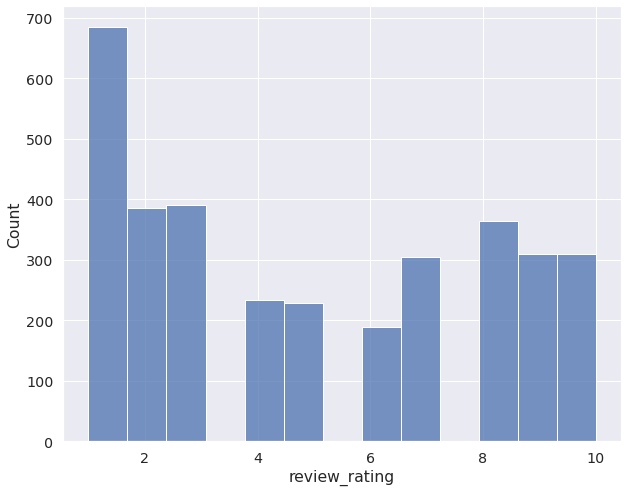

In [74]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.histplot(data=reviews, x='review_rating')
plt.show()

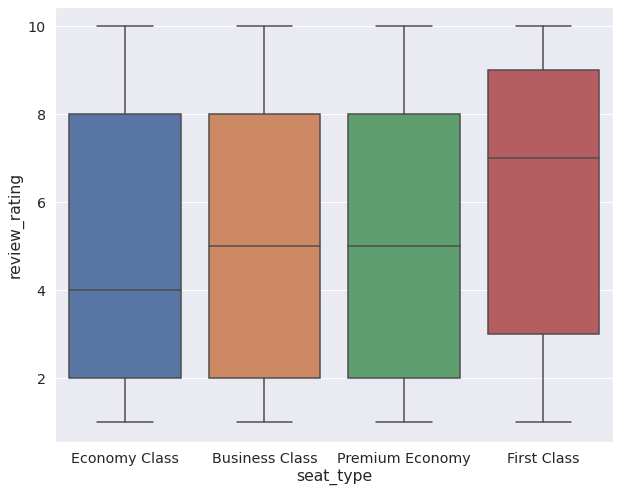

In [75]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.boxplot(data=reviews, x='seat_type', y='review_rating')
plt.show()

In [76]:
reviews.groupby('seat_type').agg(
            Average_Review_Rating=('review_rating', 'mean'),
            Average_Seat_Comfort_rating=('seat_comfort', 'mean')
            )

,Average_Review_Rating,Average_Seat_Comfort_rating
seat_type,,
Business Class,5.271661,2.929603
Economy Class,4.562716,2.759494
First Class,6.038647,3.710145
Premium Economy,5.026087,3.046377


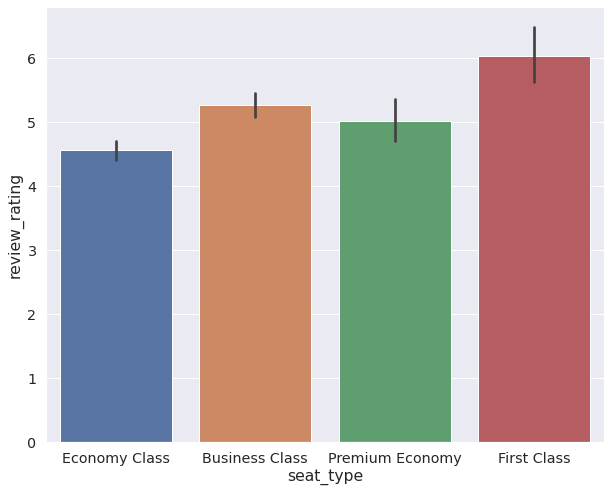

In [77]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.barplot(data=reviews, x='seat_type', y='review_rating')
plt.show()

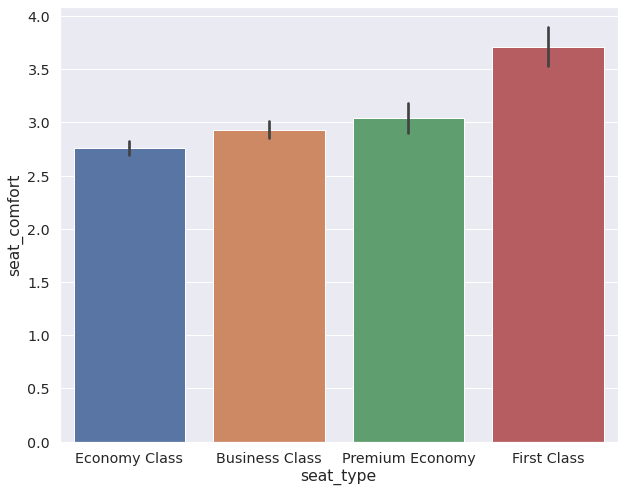

In [78]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.barplot(data=reviews, x='seat_type', y='seat_comfort')
plt.show()

In [79]:
reviews.groupby('traveller_type').agg(
            Average_Review_Rating=('review_rating', 'mean'),
            Average_Seat_Comfort_rating=('seat_comfort', 'mean')
            )

,Average_Review_Rating,Average_Seat_Comfort_rating
traveller_type,,
Business,3.698795,2.493976
Couple Leisure,5.099839,2.940419
Family Leisure,4.616477,2.826705
Solo Leisure,5.434996,3.078496


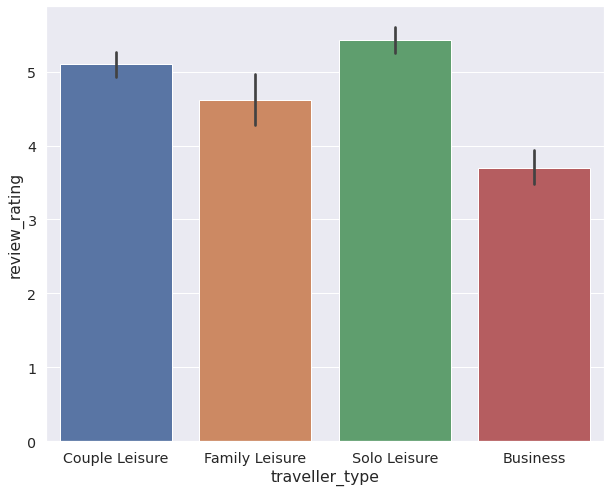

In [80]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.barplot(data=reviews, x='traveller_type', y='review_rating')
plt.show()

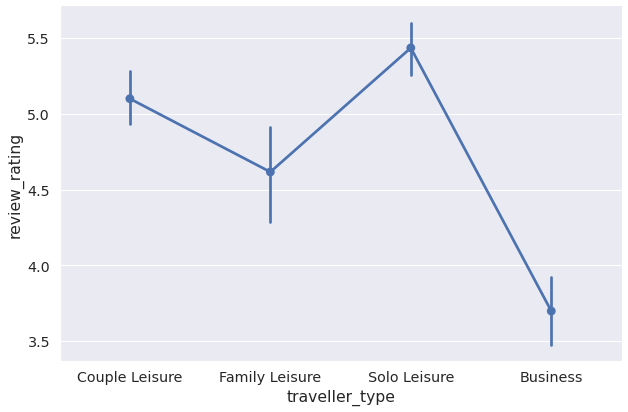

In [81]:
sns.set(font_scale=1.3)
sns.catplot(data=reviews,
            x='traveller_type',
            y='review_rating',
            kind='point',
            height=6,
            aspect=1.5)
plt.show()


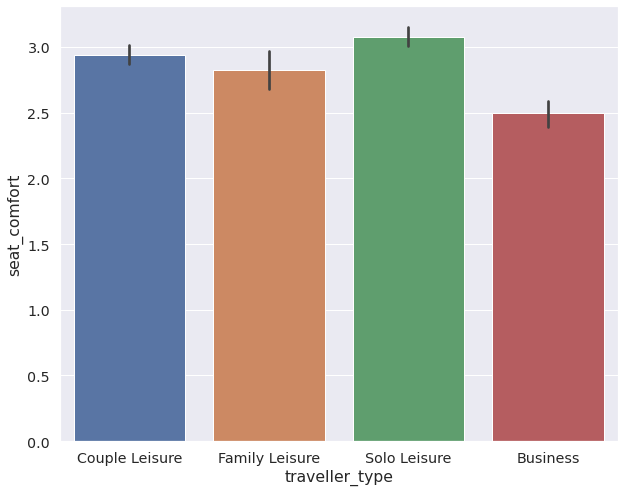

In [82]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.barplot(data=reviews, x='traveller_type', y='seat_comfort')
plt.show()

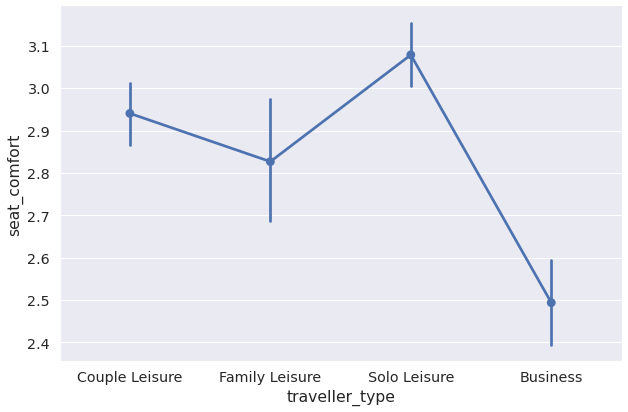

In [83]:
sns.set(font_scale=1.3)
sns.catplot(data=reviews,
            x='traveller_type',
            y='seat_comfort',
            kind='point',
            height=6,
            aspect=1.5)
plt.show()


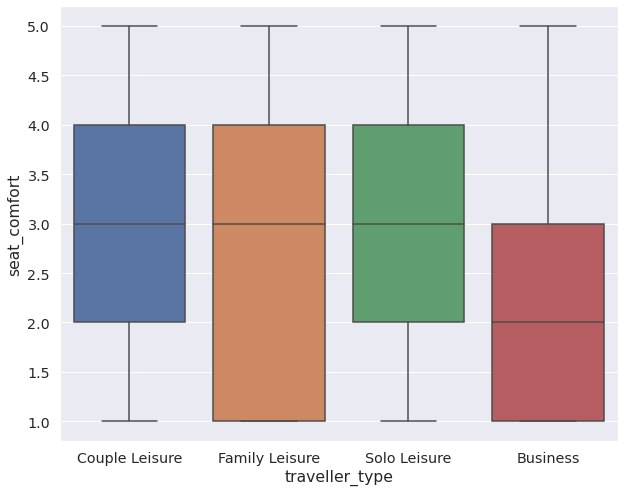

In [84]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.boxplot(data=reviews, x='traveller_type', y='seat_comfort')
plt.show()

In [85]:
reviews.value_counts('recommended')

recommended
no     1936
yes    1462
dtype: int64

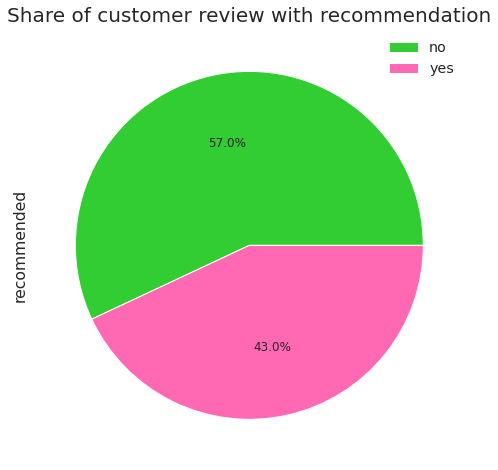

In [86]:
plt.figure(figsize=(15,8))

reviews['recommended'].value_counts().plot(kind='pie',
                                         colors=mycolors[:2],
                                         labels=None,
                                         autopct='%1.1f%%',
                                         textprops={'size':12})

plt.title('Share of customer review with recommendation', fontdict={'size':20})
plt.legend(["no", "yes"],
           loc="upper right",
           frameon=True,
           facecolor='w',
           edgecolor='w')
plt.show()

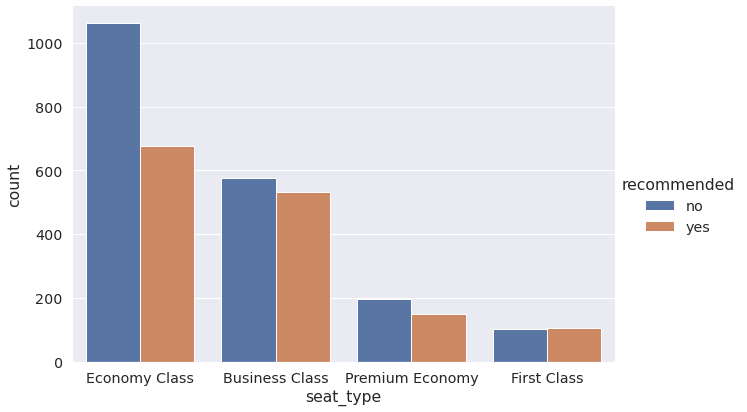

In [87]:
sns.set(font_scale=1.3)
sns.catplot(data=reviews,
            x='seat_type',
            hue='recommended',
            kind='count',
            height=6,
            aspect=1.5)
plt.show()

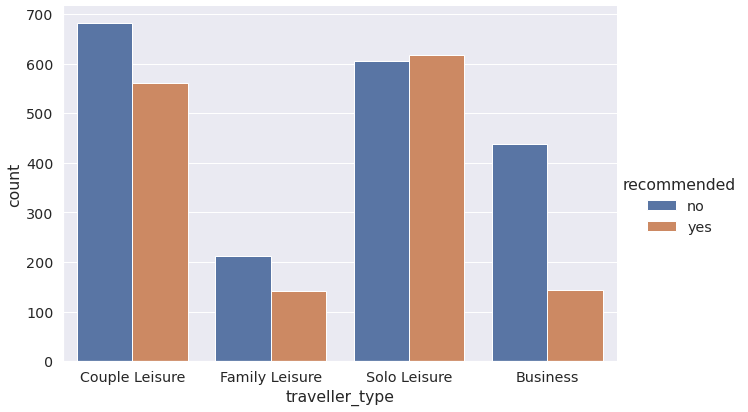

In [88]:
sns.set(font_scale=1.3)
sns.catplot(data=reviews,
            x='traveller_type',
            hue='recommended',
            kind='count',
            height=6,
            aspect=1.5)
plt.show()

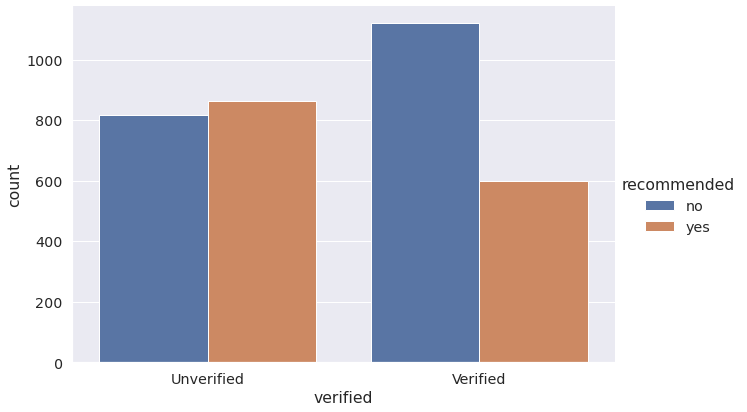

In [89]:
sns.set(font_scale=1.3)
sns.catplot(data=reviews,
            x='verified',
            hue='recommended',
            kind='count',
            height=6,
            aspect=1.5)
plt.show()


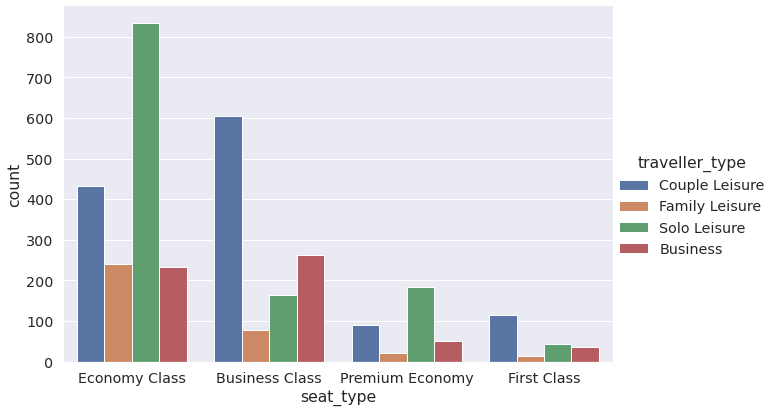

In [90]:
sns.set(font_scale=1.3)
sns.catplot(data=reviews,
            x='seat_type',
            hue='traveller_type',
            kind='count',
            height=6,
            aspect=1.5)
plt.show()

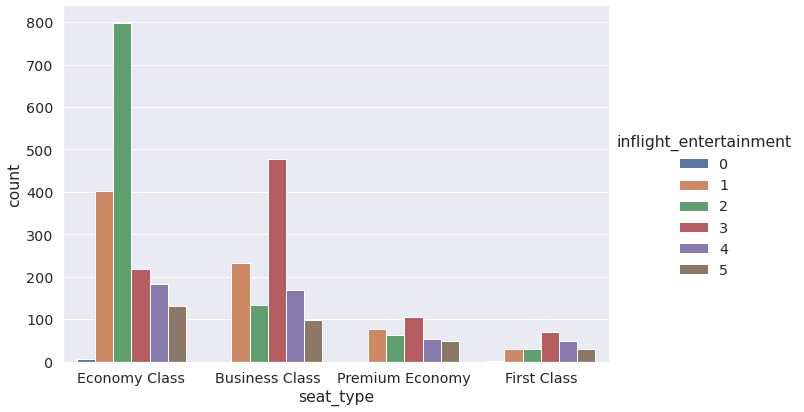

In [91]:
sns.set(font_scale=1.3)
sns.catplot(data=reviews,
            x='seat_type',
            hue='inflight_entertainment',
            kind='count',
            height=6,
            aspect=1.5)
plt.show()

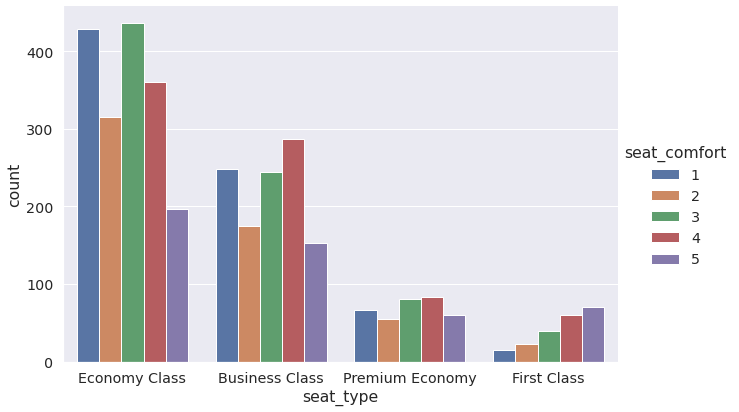

In [92]:
sns.set(font_scale=1.3)
sns.catplot(data=reviews,
            x='seat_type',
            hue='seat_comfort',
            kind='count',
            height=6,
            aspect=1.5)
plt.show()

##### Time series Viz

In [93]:
reviews['year'] = reviews['date_converted'].dt.year
reviews.head()

,review_rating,review_title,username_loc_date,verified,review_text,traveller_type,seat_type,route,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,value_for_money,recommended,location,date,date_converted,year
0,2,"""It was a nightmare""",Guadalupe Carlos-Alarcon (United States) 18th ...,Unverified,They changed our Flights from Brussels to Lond...,Couple Leisure,Economy Class,Brussels to Los Angeles via London Heathrow,1,4,1,3,1,1,no,United States,18th April 2023,2023-04-18,2023
1,5,"""Abysmal service""",Patrick Sparks (United States) 18th April 2023,Unverified,At Copenhagen the most chaotic ticket counter ...,Couple Leisure,Economy Class,Copenhagen to London,1,4,2,2,2,2,no,United States,18th April 2023,2023-04-18,2023
2,1,"""trained to give you the runaround""",T Cayle (United States) 17th April 2023,Verified,Worst experience of my life trying to deal wit...,Family Leisure,Economy Class,London to Denver,2,5,2,3,4,1,no,United States,17th April 2023,2023-04-17,2023
3,3,"""they only had one choice of meal""",1 reviews\n\n\n\nAndrew Pybus (Hong Kong) 17th...,Verified,Due to code sharing with Cathay Pacific I was ...,Solo Leisure,Economy Class,Hong Kong to London,2,1,1,1,2,2,no,Hong Kong,17th April 2023,2023-04-17,2023
4,4,"""relentless BA cost cutting""",M Edwards (United Kingdom) 16th April 2023,Verified,LHR check in was quick at the First Wing and q...,Business,Business Class,Heathrow to Malaga,3,3,4,3,3,2,no,United Kingdom,16th April 2023,2023-04-16,2023


In [94]:
reviews[['review_rating','year']].groupby('year').mean().reset_index()

,year,review_rating
0,2012,6.750000
1,2014,6.019481
2,2015,5.447802
3,2016,5.021239
4,2017,3.901786
5,2018,4.439103
6,2019,4.902941
7,2020,5.121951
8,2021,4.800000
9,2022,4.256545


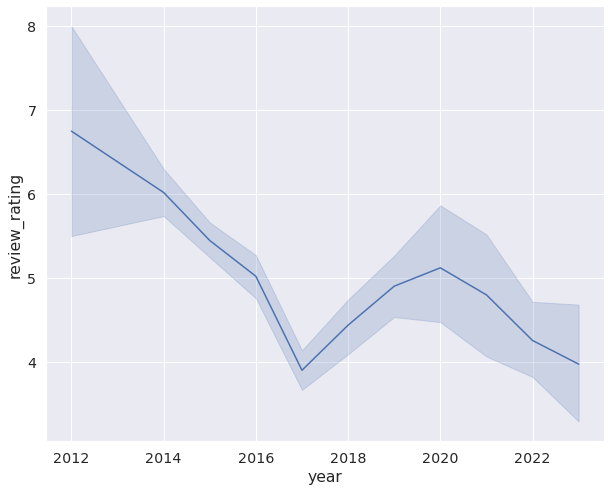

In [95]:
plt.figure(figsize=(10,8))
sns.lineplot(x='year',y='review_rating',data=reviews)
plt.show()

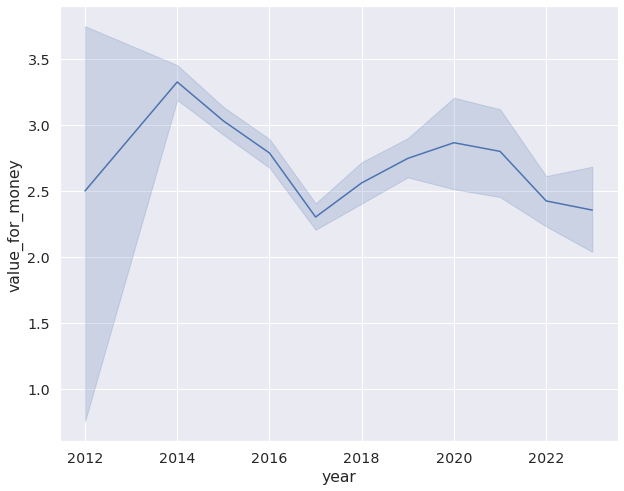

In [96]:
plt.figure(figsize=(10,8))
sns.lineplot(x='year',y='value_for_money',data=reviews)
plt.show()

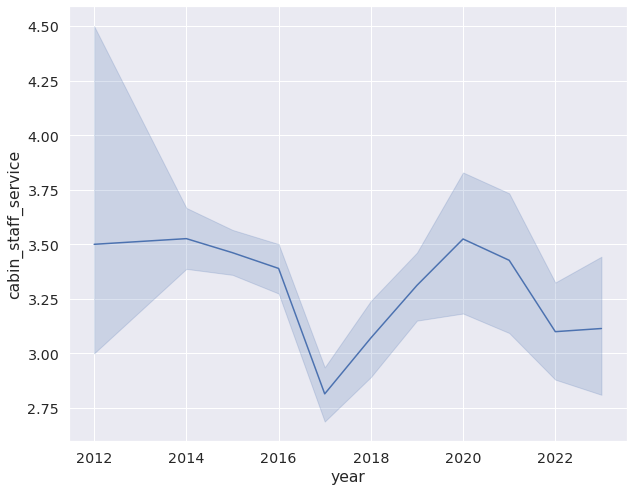

In [97]:
plt.figure(figsize=(10,8))
sns.lineplot(x='year',y='cabin_staff_service',data=reviews)
plt.show()

In [98]:
reviews[['seat_comfort','year']].groupby('year').mean().reset_index()

,year,seat_comfort
0,2012,4.000000
1,2014,3.300866
2,2015,2.997253
3,2016,2.975221
4,2017,2.551786
5,2018,2.692308
6,2019,2.876471
7,2020,3.024390
8,2021,2.933333
9,2022,2.780105


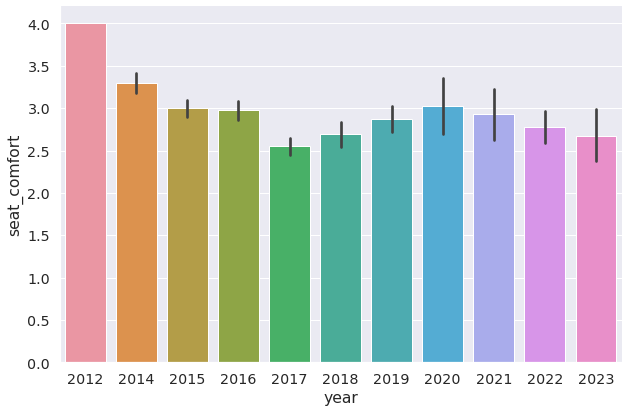

In [99]:
sns.catplot(x='year', y='seat_comfort', data=reviews, kind='bar', height=6,aspect=1.5)
plt.show()

### Relationship between variables

In [100]:
reviews.corr()

,review_rating,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,value_for_money,year
review_rating,1.000000,0.740265,0.724815,0.742393,0.458954,0.629719,0.869494,-0.143304
seat_comfort,0.740265,1.000000,0.590082,0.596938,0.430998,0.472945,0.694959,-0.094007
cabin_staff_service,0.724815,0.590082,1.000000,0.682320,0.381054,0.460219,0.655527,-0.072649
food_beverages,0.742393,0.596938,0.682320,1.000000,0.478443,0.432199,0.692790,-0.103851
inflight_entertainment,0.458954,0.430998,0.381054,0.478443,1.000000,0.298339,0.425279,0.002071
ground_service,0.629719,0.472945,0.460219,0.432199,0.298339,1.000000,0.583044,-0.084847
value_for_money,0.869494,0.694959,0.655527,0.692790,0.425279,0.583044,1.000000,-0.147933
year,-0.143304,-0.094007,-0.072649,-0.103851,0.002071,-0.084847,-0.147933,1.000000


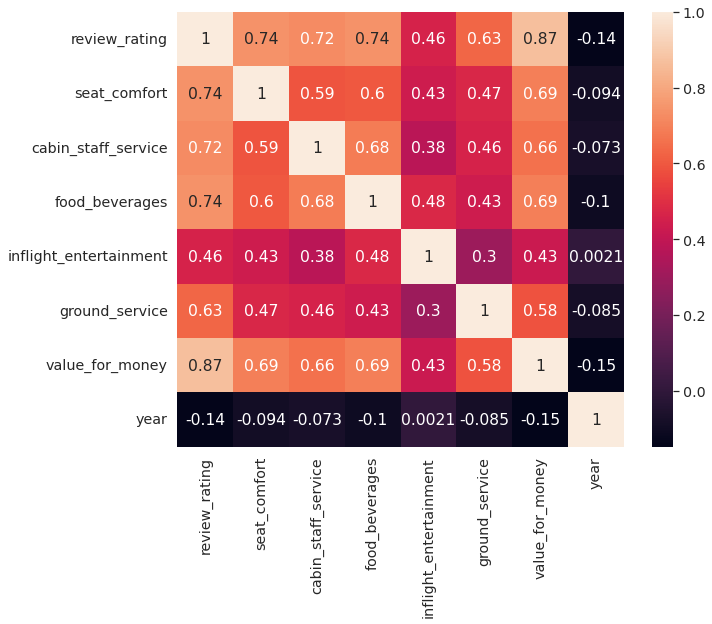

In [101]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.heatmap(reviews.corr(), annot=True)
plt.show()

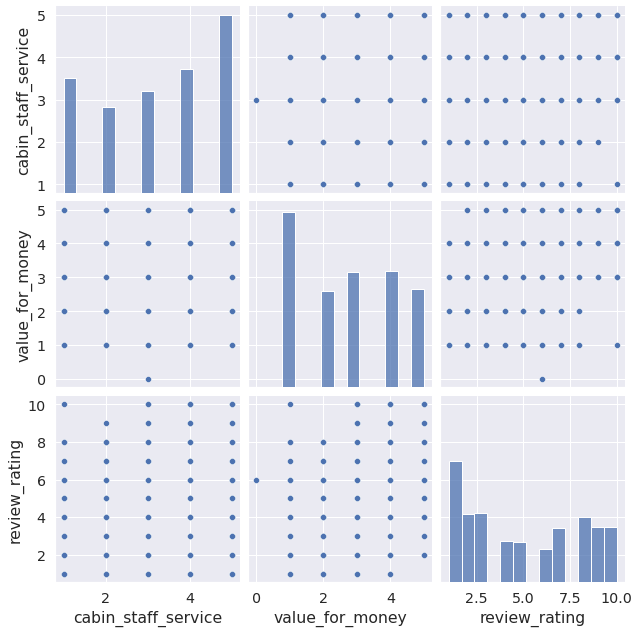

In [102]:
sns.set(font_scale=1.3)
sns.pairplot(data=reviews,
             vars=['cabin_staff_service', 'value_for_money', 'review_rating'],
             height=3)
plt.show()

##### Chloropleth map

In [103]:
reviews['location'].unique()

array(['United States', 'Hong Kong', 'United Kingdom', 'Netherlands',
       'Austria', 'France', 'India', 'Ireland', 'Canada', 'Belgium',
       'United Arab Emirates', 'Spain', 'New Zealand', 'Czech Republic',
       'Italy', 'Malaysia', 'Singapore', 'Australia', 'South Africa',
       'Germany', 'Switzerland', 'Bermuda', 'Botswana', 'Brazil',
       'Panama', 'Sweden', 'Greece', 'Russian Federation', 'Ghana',
       'Bulgaria', 'Poland', 'Thailand', 'Argentina', 'Mexico', 'Denmark',
       'Saint Kitts and Nevis', 'Vietnam', 'Norway', 'Jordan', 'Japan',
       'China', 'Slovakia', 'Kuwait', 'Israel', 'Qatar', 'Romania',
       'South Korea', 'Saudi Arabia', 'Hungary', 'Nigeria', 'Portugal',
       'Taiwan', 'Cayman Islands', 'Costa Rica', 'Egypt', 'Iceland',
       'Laos', 'Turkey', 'Indonesia', 'Dominican Republic', 'Cyprus',
       'Luxembourg', 'Philippines', 'Finland', 'Ukraine',
       'Trinidad & Tobago', 'Barbados', 'Oman'], dtype=object)

In [104]:
len(reviews['location'].unique())

68

#### Geocoding countries to get latitude and longitude data

In [105]:
from geopy.geocoders import Nominatim
import pycountry

In [106]:
countries = list(reviews['location'].unique())

In [107]:
def get_coordinates(country):
    try:
        country_obj = pycountry.countries.get(name=country)
        geolocator = Nominatim(user_agent="Geolocation")
        location = geolocator.geocode(country_obj.name)
        return location.latitude, location.longitude
    except AttributeError:
        return None, None

In [108]:
coords = list(map(get_coordinates, countries))

In [109]:
len(coords), len(countries)

(68, 68)

In [110]:
import folium

In [111]:
m = folium.Map(tiles='Cartodb Positron', zoom_start=2)

for country, coord in zip(countries, coords):
    if coord[0] is None:
        continue
    else:
        folium.Marker(location=coord,
                      popup=country,
                      icon=folium.Icon(icon='glyphicon-plane', prefix='glyphicon', color='green'),
                      tooltip='<h5>Click here for more info!</h5>').add_to(m)

m

In [112]:
reviews.rename(columns={"location": "sovereignt"}, inplace=True)
reviews.head()

,review_rating,review_title,username_loc_date,verified,review_text,traveller_type,seat_type,route,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,value_for_money,recommended,sovereignt,date,date_converted,year
0,2,"""It was a nightmare""",Guadalupe Carlos-Alarcon (United States) 18th ...,Unverified,They changed our Flights from Brussels to Lond...,Couple Leisure,Economy Class,Brussels to Los Angeles via London Heathrow,1,4,1,3,1,1,no,United States,18th April 2023,2023-04-18,2023
1,5,"""Abysmal service""",Patrick Sparks (United States) 18th April 2023,Unverified,At Copenhagen the most chaotic ticket counter ...,Couple Leisure,Economy Class,Copenhagen to London,1,4,2,2,2,2,no,United States,18th April 2023,2023-04-18,2023
2,1,"""trained to give you the runaround""",T Cayle (United States) 17th April 2023,Verified,Worst experience of my life trying to deal wit...,Family Leisure,Economy Class,London to Denver,2,5,2,3,4,1,no,United States,17th April 2023,2023-04-17,2023
3,3,"""they only had one choice of meal""",1 reviews\n\n\n\nAndrew Pybus (Hong Kong) 17th...,Verified,Due to code sharing with Cathay Pacific I was ...,Solo Leisure,Economy Class,Hong Kong to London,2,1,1,1,2,2,no,Hong Kong,17th April 2023,2023-04-17,2023
4,4,"""relentless BA cost cutting""",M Edwards (United Kingdom) 16th April 2023,Verified,LHR check in was quick at the First Wing and q...,Business,Business Class,Heathrow to Malaga,3,3,4,3,3,2,no,United Kingdom,16th April 2023,2023-04-16,2023


In [113]:
reviews.groupby('sovereignt')['review_rating'].count() \
                        .sort_values(ascending=False).head(10)

sovereignt
United Kingdom    2178
United States      346
Australia          144
Canada             102
Germany             57
Ireland             37
South Africa        37
Switzerland         35
Netherlands         32
Spain               28
Name: review_rating, dtype: int64

In [114]:
sub_rev = pd.DataFrame(reviews.groupby('sovereignt')['review_rating'].count() \
                        .sort_values(ascending=False)).reset_index()

geojson_url = 'https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_0_countries.geojson'

In [115]:
chl_map = folium.Map(tiles='Cartodb Positron', zoom_start=2)

folium.Choropleth(
            geo_data=geojson_url,
            data=sub_rev,
            columns=['sovereignt', 'review_rating'], 
            key_on='feature.properties.sovereignt',
            fill_color='YlOrRd',
            nan_fill_color="White",
            fill_opacity=0.7,
            line_opacity=0.2,
            highlight=True,
            overlay=False,
            legend_name='Share of reviews by country',
            line_color='black').add_to(chl_map)


chl_map

# Sentiment Analysis

In [116]:
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

reviews['sentiment'] = reviews['review_text'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )

reviews['sentiment_type'] = reviews['sentiment'].apply(
    lambda value: 'Positive' if value > 0
    else ('Negative' if value < 0 else 'Neutral')
    )

In [117]:
import joblib

joblib.dump(sentiment_analyzer, 'sentalyzer.joblib')

['sentalyzer.joblib']

In [118]:
reviews[['review_text', 'sentiment', 'sentiment_type']].head(10)

,review_text,sentiment,sentiment_type
0,They changed our Flights from Brussels to Lond...,-0.8055,Negative
1,At Copenhagen the most chaotic ticket counter ...,0.1015,Positive
2,Worst experience of my life trying to deal wit...,-0.9600,Negative
3,Due to code sharing with Cathay Pacific I was ...,-0.8510,Negative
4,LHR check in was quick at the First Wing and q...,0.9176,Positive
5,I wouldn't recommend British Airways at all. I...,-0.9372,Negative
6,Absolutely horrible experience. I booked a tic...,-0.5883,Negative
7,This is the worst airline. Not one thing went ...,-0.9392,Negative
8,I will never fly British Airways again. To sta...,-0.5033,Negative
9,Worst aircraft I have ever flown. The seats we...,-0.8984,Negative


In [119]:
reviews['sentiment_type'].value_counts()

Positive    2053
Negative    1339
Neutral        6
Name: sentiment_type, dtype: int64

In [120]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [121]:
plt.style.use('seaborn-dark')

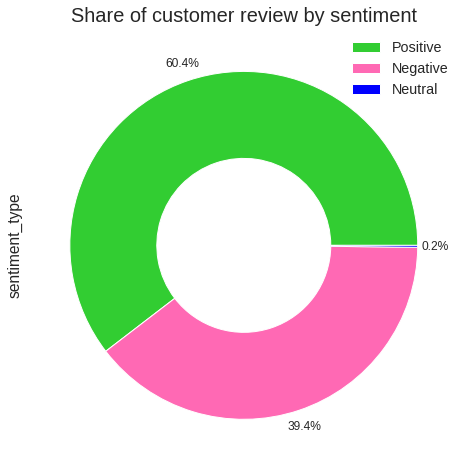

In [122]:
plt.figure(figsize=(15,8))
reviews['sentiment_type'].value_counts().plot(kind='pie',
                                         colors=mycolors,
                                         labels=None,
                                         autopct='%1.1f%%',
                                         pctdistance=1.1,
                                         labeldistance=1.5,
                                         textprops={'size':12},
                                         wedgeprops=dict(width=0.5))

plt.title('Share of customer review by sentiment', fontdict={'size':20})
plt.legend(["Positive", "Negative", "Neutral"],
           loc="upper right",
           frameon=True,
           facecolor='w',
           edgecolor='w')
plt.show()

In [123]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center', fontdict={'size':15})

In [124]:
x = list(reviews['sentiment_type'].value_counts().keys())
y = list(reviews['sentiment_type'].value_counts().values)

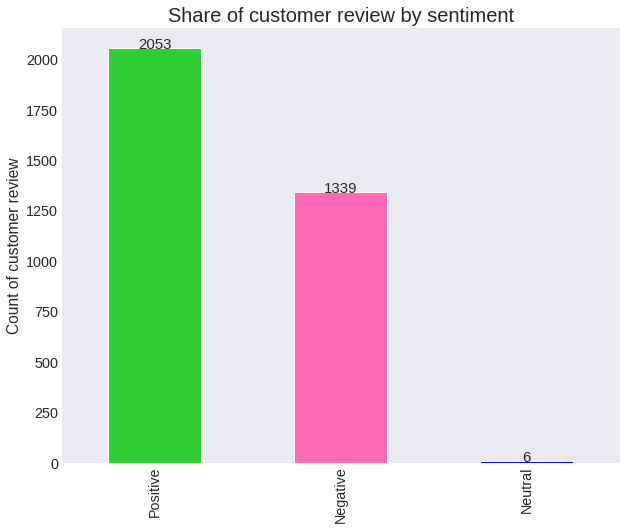

In [125]:
plt.figure(figsize=(10,8))
reviews['sentiment_type'].value_counts().plot(kind='bar', color=mycolors)
plt.title('Share of customer review by sentiment', fontdict={'size':20})
plt.ylabel('Count of customer review')
addlabels(x, y)
plt.show()

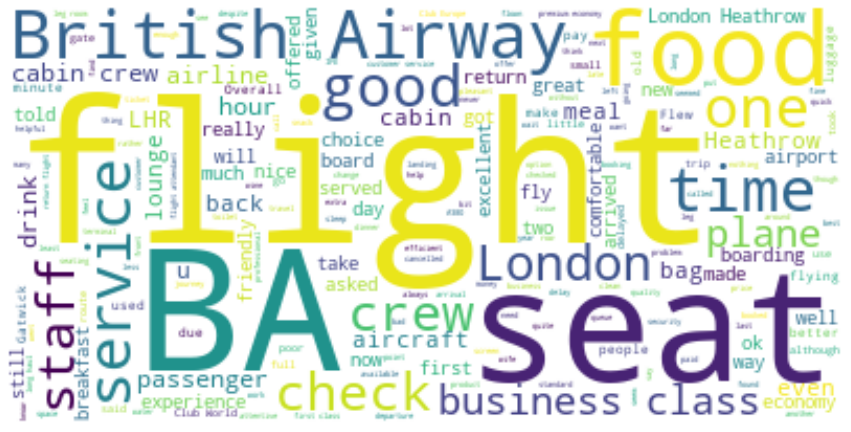

In [126]:
from wordcloud import WordCloud

wordcloud = WordCloud(random_state=0, background_color="white").generate(' '.join(reviews['review_text']))

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

In [127]:
reviews.to_csv

<bound method NDFrame.to_csv of       review_rating                         review_title  \
0                 2                 "It was a nightmare"   
1                 5                    "Abysmal service"   
2                 1  "trained to give you the runaround"   
3                 3   "they only had one choice of meal"   
4                 4         "relentless BA cost cutting"   
...             ...                                  ...   
3512              8      British Airways customer review   
3513              8      British Airways customer review   
3514              6      British Airways customer review   
3515              8      British Airways customer review   
3516              5      British Airways customer review   

                                      username_loc_date    verified  \
0     Guadalupe Carlos-Alarcon (United States) 18th ...  Unverified   
1        Patrick Sparks (United States) 18th April 2023  Unverified   
2               T Cayle (United St

In [128]:
reviews.to_csv('data/finalised_reviews_for_dashboard.csv', index=False)

In [129]:
reviews.shape

(3398, 21)

In [130]:
reviews[reviews.username_loc_date.str.contains('J K Suykerbuyk')]

,review_rating,review_title,username_loc_date,verified,review_text,traveller_type,seat_type,route,seat_comfort,cabin_staff_service,...,inflight_entertainment,ground_service,value_for_money,recommended,sovereignt,date,date_converted,year,sentiment,sentiment_type
2815,5,British Airways customer review,J K Suykerbuyk (Belgium) 18th May 2015,Unverified,BRU-LHR-YYZ: CLUB Europe - Club World; This ti...,Couple Leisure,Business Class,London to Johannesburg,1,5,...,5,3,5,yes,Belgium,18th May 2015,2015-05-18,2015,-0.9161,Negative
2831,9,British Airways customer review,J K Suykerbuyk (Belgium) 8th May 2015,Unverified,BRU-LHR-DFW-SAT. BRU-LHR: Club Europe Smooth c...,Couple Leisure,First Class,LHR to SIN,5,5,...,4,3,5,yes,Belgium,8th May 2015,2015-05-08,2015,0.9983,Positive
2835,10,British Airways customer review,J K Suykerbuyk (Belgium) 8th May 2015,Unverified,SAT-DFW-LHR-BRU: First First club Europe. SAT-...,Couple Leisure,First Class,LHR to SIN,5,5,...,5,3,5,yes,Belgium,8th May 2015,2015-05-08,2015,0.9925,Positive


# Topic Modeling with Clustering

In [131]:
months = ['Januanry', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']


for month in months:
    print(reviews[reviews['review_text'].str.contains(month)]['review_text'])

Series([], Name: review_text, dtype: object)
38      The usual shambolic unfolding that BA has now ...
57      My review relates to the appalling experiences...
62      My husband and myself were flying to Madrid on...
273     British Airways has scrapped the mandatory wea...
287     Over the past 2 years I have flown with Britis...
411     Flight BA 282 on 11 February was delayed 173 m...
439     I flew from Sydney to London to visit my serio...
787     Miami to Tel Aviv via London. At Miami airport...
794     My husband and I flew on British Airways fligh...
1074    I traveled on British Airways with my wife fro...
1126    Flew BA 1311 on February 10th, from Aberdeen t...
1146    I was due to fly London Heathrow to Vancouver ...
1586    London to Nairobi return in February, during t...
1592    I am 73 years old. Was scheduled to fly from M...
1629    Phoenix to London Heathrow. Due to a problem w...
1672    Gatwick to Barbados, outbound on 19th January ...
1673    Bordeaux to London 

In [132]:
reviews["review_text"][1197]

"Berlin to London City. I have never experienced such an unreliable, unprofessional airline, that is so hard to contact. My flight kept being delayed for hours. After more than 4 hours delay, there was no point for me to fly to London anymore, as I had missed an important meeting. I was told that I will get my flight price refunded and also get a compensation. After a few days I call their customer support to ask about the refund. They told me that I will get the refund within 7 days. After 4 weeks, I notice that they still haven't refunded me. It's very difficult to contact them. The phone hotline is only available until 5pm (Monday-Friday). They hide the contact form somewhere deep in their website. Once I managed to send them a message, I only get a reply a few days later telling me, that they can't reply to this case via email and that I should call. All I want at this point is to get my deserved flight price refund. I take an hour off my work to be able to call in their short open

In [133]:
reviews["review_text"] = reviews["review_text"].str.replace('✅', '')
reviews["review_text"] = reviews["review_text"].str.replace('❎', '')
reviews["review_text"] = reviews["review_text"].str.strip()
reviews["review_text"].head()

0    They changed our Flights from Brussels to Lond...
1    At Copenhagen the most chaotic ticket counter ...
2    Worst experience of my life trying to deal wit...
3    Due to code sharing with Cathay Pacific I was ...
4    LHR check in was quick at the First Wing and q...
Name: review_text, dtype: object

In [134]:
reviews["review_text"][1197]

"Berlin to London City. I have never experienced such an unreliable, unprofessional airline, that is so hard to contact. My flight kept being delayed for hours. After more than 4 hours delay, there was no point for me to fly to London anymore, as I had missed an important meeting. I was told that I will get my flight price refunded and also get a compensation. After a few days I call their customer support to ask about the refund. They told me that I will get the refund within 7 days. After 4 weeks, I notice that they still haven't refunded me. It's very difficult to contact them. The phone hotline is only available until 5pm (Monday-Friday). They hide the contact form somewhere deep in their website. Once I managed to send them a message, I only get a reply a few days later telling me, that they can't reply to this case via email and that I should call. All I want at this point is to get my deserved flight price refund. I take an hour off my work to be able to call in their short open

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import glob
import re

In [136]:
revs = reviews['review_text']

In [137]:
def remove_stops(text, stops):
    text = re.sub(r'\w+\-+\w{1,5}\-\w{1,5}', '', text)
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
    final = ' '.join(final)
    final = final.translate(str.maketrans('', '', string.punctuation))
    final = ''.join([i for i in final if not i.isdigit()])
    
    while '  ' in final:
        final = final.replace('  ', ' ')
        
    return final

In [138]:
def clean_docs(docs, months):
    stops = stopwords.words('english')
    stops = stops + months
    final = []
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    return final

In [139]:
cleaned_docs = clean_docs(revs, months)

In [140]:
print(revs[0])
print('\n\n')
print(cleaned_docs[0])

They changed our Flights from Brussels to London Heathrow to LAX on 4/16/2023. We paid extra to choose our seats. Since they cancelled they never honored the seat that we bought, they seated us in totally different seats. I asked the check in employee, she was very rude and told us that we have to understand that was a different flight. From London to LAX was worse, nobody in the airport help us. Employees from BA told us that we have to return next day for our flight we can rent a hotel or go terminal 3 and sleep there. Finally one employee help us and gives a voucher for hotel. It was a nightmare this airline. We missed one day work and BA didn’t return the money that we paid for our previous chosen seats.



They changed Flights Brussels London Heathrow LAX We paid extra choose seats Since cancelled never honored seat bought seated us totally different seats I asked check employee rude told us understand different flight From London LAX worse nobody airport help us Employees BA told

In [141]:
vectorizer = TfidfVectorizer(
                    lowercase=True,
                    max_features=200,
                    max_df=0.8,
                    min_df=5,
                    ngram_range=(1,3),
                    stop_words='english'
                    )

In [142]:
vectors = vectorizer.fit_transform(cleaned_docs)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()

In [143]:
all_keywords = []

for text in denselist:
    x = 0
    keywords = []
    for word in text:
        if word > 0:
            keywords.append(feature_names[x])
        x = x + 1
    all_keywords.append(keywords)

print(revs[0])
print('\n\n')
print(all_keywords[0])

They changed our Flights from Brussels to London Heathrow to LAX on 4/16/2023. We paid extra to choose our seats. Since they cancelled they never honored the seat that we bought, they seated us in totally different seats. I asked the check in employee, she was very rude and told us that we have to understand that was a different flight. From London to LAX was worse, nobody in the airport help us. Employees from BA told us that we have to return next day for our flight we can rent a hotel or go terminal 3 and sleep there. Finally one employee help us and gives a voucher for hotel. It was a nightmare this airline. We missed one day work and BA didn’t return the money that we paid for our previous chosen seats.



['airline', 'airport', 'asked', 'ba', 'cancelled', 'check', 'day', 'different', 'extra', 'flight', 'flights', 'heathrow', 'help', 'london', 'london heathrow', 'money', 'paid', 'return', 'seat', 'seats', 'sleep', 'terminal', 'told', 'work']


### Clustering with KMeans

In [144]:
true_k = 5

model = KMeans(n_clusters=true_k,
               init='k-means++',
               max_iter=100,
               n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

In [145]:
for i in range(true_k):
    print(f'Cluster {i}:')
    print('----------')
    for ind in order_centroids[i, :10]:
        print(terms[ind])
    print('\n')

Cluster 0:
----------
flight
ba
hours
staff
delayed
told
customer
airport
london
luggage


Cluster 1:
----------
seat
ba
economy
flight
seats
food
premium
service
premium economy
london


Cluster 2:
----------
class
business
business class
seats
seat
ba
flight
food
service
economy


Cluster 3:
----------
good
flight
crew
cabin
ba
service
food
time
club
lounge


Cluster 4:
----------
airways
british
british airways
flight
london
heathrow
service
london heathrow
staff
airline




### Principal Component Analysis (PCA)

In [146]:
from sklearn.decomposition import PCA

In [147]:
kmean_indices = model.fit_predict(vectors)

pca = PCA(n_components=5)

scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = ['r', 'b', 'k', 'y', 'g']

x_axis = [j[0] for j in scatter_plot_points]
y_axis = [j[1] for j in scatter_plot_points]

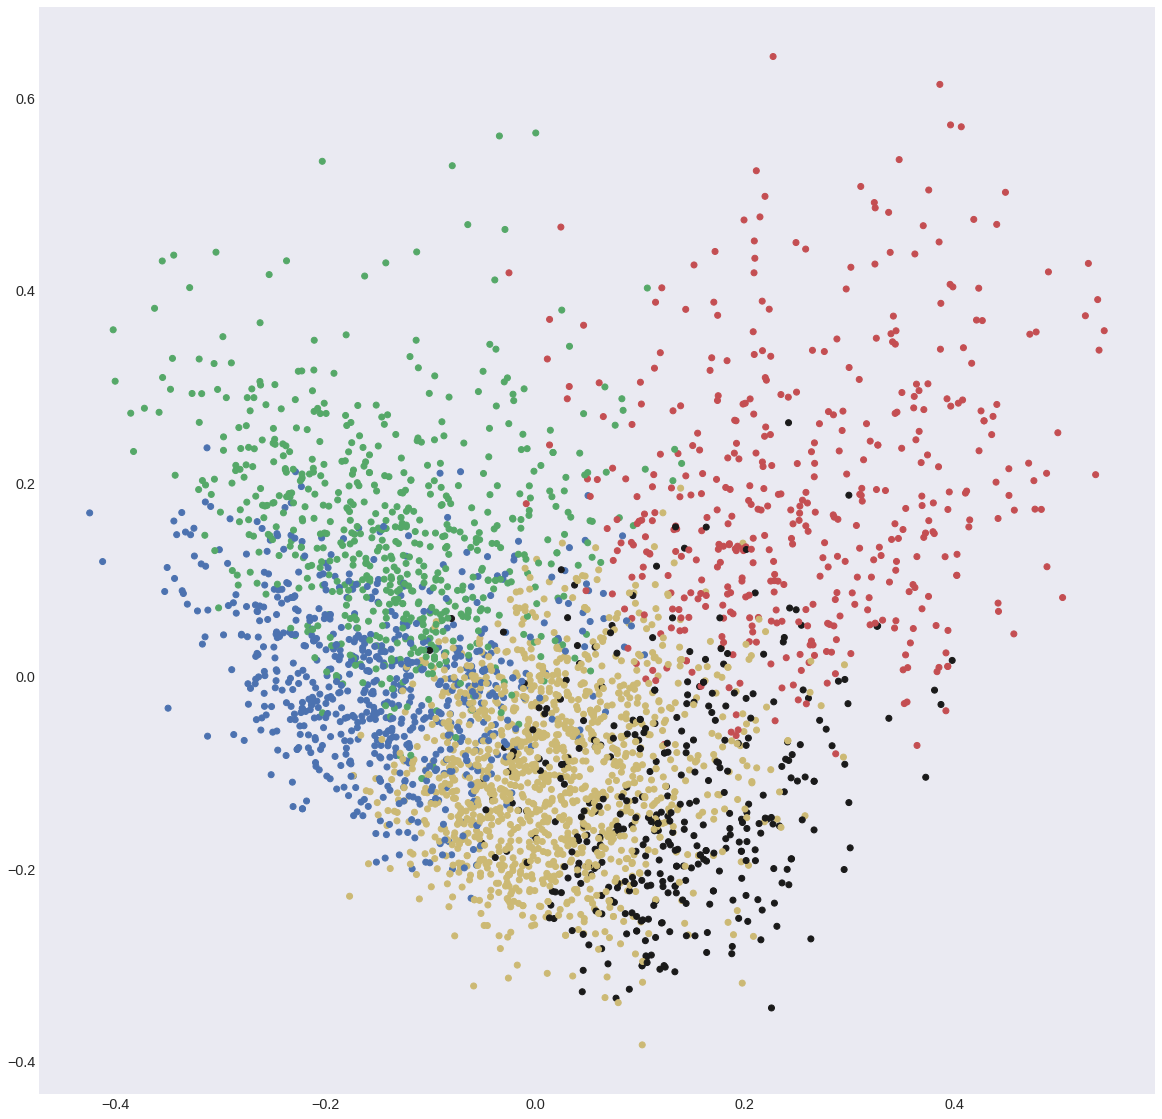

In [148]:
fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

seat_type = reviews['seat_type']

# for i, txt in enumerate(seat_type):
#     ax.annotate(txt.split(" ")[0], (x_axis[i], y_axis[i]))
    
plt.show()

# Topic Modeling with LDA

In [149]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz
import spacy
import en_core_web_sm
from gensim.models import TfidfModel
import pyLDAvis
import pyLDAvis.gensim


2023-04-25 15:00:22.188441: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 15:00:22.726453: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-25 15:00:22.726490: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-25 15:00:22.789688: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-25 15:00:24.284862: W tensorflow/stream_executor/platform/de

In [150]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return texts_out

In [151]:
lemmatized_texts = lemmatization(revs)
print(lemmatized_texts[0])

change flight pay extra choose seat cancel never honor seat buy seat totally different seat ask check employee be very rude tell have understand be different flight be bad airport help employee tell have return next day flight rent hotel go terminal sleep there finally employee help give voucher hotel be nightmare airline miss day work do return money pay previous choose seat


In [152]:
def remove_stops_gensim(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text)
        final.append(new)
    return final


rev_words = remove_stops_gensim(lemmatized_texts)
print(rev_words[0])

['change', 'flight', 'pay', 'extra', 'choose', 'seat', 'cancel', 'never', 'honor', 'seat', 'buy', 'seat', 'totally', 'different', 'seat', 'ask', 'check', 'employee', 'be', 'very', 'rude', 'tell', 'have', 'understand', 'be', 'different', 'flight', 'be', 'bad', 'airport', 'help', 'employee', 'tell', 'have', 'return', 'next', 'day', 'flight', 'rent', 'hotel', 'go', 'terminal', 'sleep', 'there', 'finally', 'employee', 'help', 'give', 'voucher', 'hotel', 'be', 'nightmare', 'airline', 'miss', 'day', 'work', 'do', 'return', 'money', 'pay', 'previous', 'choose', 'seat']


In [153]:
id2word = corpora.Dictionary(rev_words)

corpus = []

for text in rev_words:
    new = id2word.doc2bow(text)
    corpus.append(new)
    
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 4), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 2), (12, 1), (13, 3), (14, 1), (15, 1), (16, 3), (17, 1), (18, 1), (19, 2), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 2), (32, 1), (33, 5), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)]


In [154]:
tfidf = TfidfModel(corpus, id2word=id2word)
low_value = 0.03
high_value = 0.8
words = []
words_missing_in_tfidf = []

for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] \
                       if value < low_value]
    high_value_words = [id for id, value in tfidf[bow] \
                        if value > high_value]
    
    drops = low_value_words + words_missing_in_tfidf + high_value_words
    
    for item in drops:
        words.append(id2word[item])
    
    words_missing_in_tfidf = [id for id in bow_ids \
                              if id not in tfidf_ids]
    
    new_bow = [b for b in bow \
               if b[0] not in low_value_words \
               and b[0] not in high_value_words \
               and b[0] not in words_missing_in_tfidf]
    
    corpus[i] = new_bow

In [155]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")

In [156]:
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)

vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.102798  0.241464       1        1  29.723667
1     -0.087757 -0.296379       2        1  23.341131
2     -0.312811  0.022703       3        1  20.403354
0      0.201509 -0.160369       4        1  20.001327
3      0.301857  0.192581       5        1   6.530520, topic_info=      Term         Freq        Total Category  logprob  loglift
33    seat  3642.000000  3642.000000  Default  30.0000  30.0000
19    have  4319.000000  4319.000000  Default  29.0000  29.0000
230   good  2120.000000  2120.000000  Default  28.0000  28.0000
40    very  2313.000000  2313.000000  Default  27.0000  27.0000
136   crew  1756.000000  1756.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
634  drink   106.154279   985.708702   Topic5  -5.0232   0.5002
180   seem    91.822785   570.257730   Topic5  -5.1682   0.9025
309   poor    83.337772   571.249406   Topic5  -5.2652   0.8038
249  offer    85.044556   807.077603   Topic5  -5.2449   0.4784
535  water    72.744346   224.577142   Topic5  -5.4011   1.6014

[342 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1547      1  0.990925     absolute
1374      5  0.985905  accommodate
515       1  0.990295      advance
284       1  0.650502        again
284       2  0.176808        again
...     ...       ...          ...
321       4  0.107303         when
678       4  0.998662       window
1378      1  0.984878         word
282       1  0.992660         year
282       5  0.007312         year

[567 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 1, 4])